In [1]:
import pyspark
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

# create spark contexts

sc = pyspark.SparkContext()
sqlContext = SQLContext(sc)

In [2]:
spark = SparkSession \
    .builder \
    .master("local[*]")\
    .appName("blogtext_preprocessing") \
    .getOrCreate()

In [3]:
blogtext_df = spark.read.csv('/spring2021/project1/blogtext.csv',header=True, inferSchema='true')

In [4]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import nltk
import preproc as pp

# preproc is a python file that has functions defined to do the "text" column preprocessing.

# Register all the functions in Preproc with Spark Context

remove_stops_udf = udf(pp.remove_stops, StringType())
remove_features_udf = udf(pp.remove_features, StringType())
tag_and_remove_udf = udf(pp.tag_and_remove, StringType())
lemmatize_udf = udf(pp.lemmatize, StringType())

In [5]:
# get the raw columns
raw_cols = blogtext_df.columns

rm_stops_df = blogtext_df.select(raw_cols)\
                   .withColumn("stop_text", remove_stops_udf(blogtext_df["text"]))

In [6]:
from functools import reduce
from pyspark.sql import DataFrame

rm_stops_df = reduce(DataFrame.drop, ['text'], rm_stops_df)
raw_cols = rm_stops_df.columns

In [7]:
rm_features_df = rm_stops_df.select(raw_cols)\
                            .withColumn("feat_text", \
                            remove_features_udf(rm_stops_df["stop_text"]))

In [8]:
rm_features_df = reduce(DataFrame.drop, ['stop_text'], rm_features_df)

raw_cols = rm_features_df.columns

In [9]:
tagged_df = rm_features_df.select(raw_cols) \
                          .withColumn("tagged_text", \
                           tag_and_remove_udf(rm_features_df.feat_text))

In [10]:
tagged_df = reduce(DataFrame.drop, ['feat_text'], tagged_df)

raw_cols = tagged_df.columns

In [11]:
lemm_df = tagged_df.select(raw_cols) \
                   .withColumn("text", lemmatize_udf(tagged_df["tagged_text"]))

In [12]:
lemm_df = reduce(DataFrame.drop, ['tagged_text'], lemm_df)

raw_cols = lemm_df.columns

In [13]:
blog_df = lemm_df.select("text")
blog_df.show(5)

+--------------------+
|                text|
+--------------------+
|info find page pd...|
|team member drewe...|
|het kader van ker...|
|           test test|
|thanks yahoo tool...|
+--------------------+
only showing top 5 rows



In [14]:
blogDF = blog_df.toPandas()

In [15]:
print(blogDF)

                                                     text
0       info find page pdf file wait untill team leade...
1       team member drewes van der laag urllink mail r...
2       het kader van kernfusie aarde maak eigen water...
3                                               test test
4       thanks yahoo toolbar capture url popups mean s...
...                                                   ...
681279  dear susan write bitter diatribe disease sprea...
681280  dear susan second yeast infection month straig...
681281           dear susan boyfriend fuck bald good luck
681282  dear susan clarify ask leave house shit piss f...
681283  hey everybody susan know name weird yankovic g...

[681284 rows x 1 columns]


In [16]:
#pip install wordcloud

In [17]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd 
import matplotlib.pyplot as plt

In [18]:
comment_words = '' 
stop_words = set(STOPWORDS)

In [19]:
for i in blogDF.text: 
    i = str(i) 
    seperate = i.split() 
    for j in range(len(seperate)): 
        seperate[j] = seperate[j].lower() 
      
    comment_words += " ".join(seperate)+" "

In [22]:
final_wordcloud = WordCloud(width = 800, height = 800,
                collocations=False,            
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)

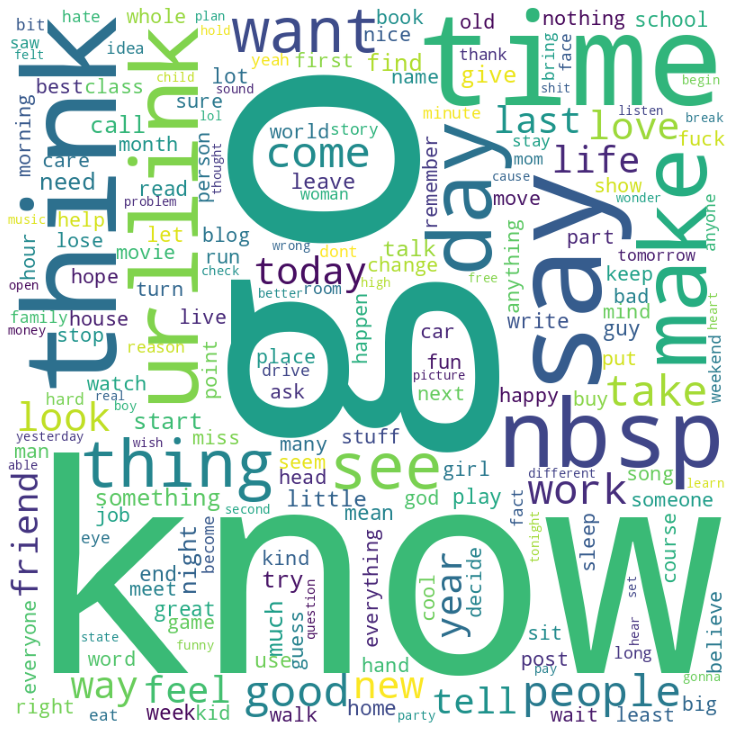

In [23]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

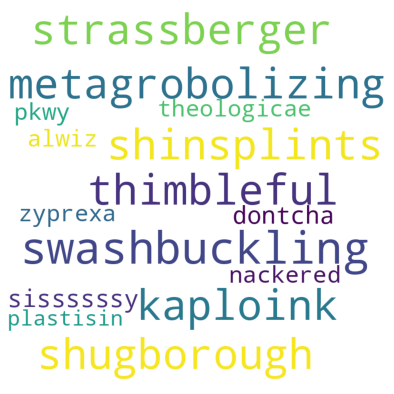

In [12]:
from wordcloud import WordCloud, STOPWORDS
#import pandas as pd 
import matplotlib.pyplot as plt



my_list=["swashbuckling", "metagrobolizing","shinsplints", "thimbleful", "kaploink", "shugborough", "strassberger", "sissssssy",
         "dontcha", "theologicae", "nackered", "zyprexa", "pkwy", "alwiz", "plastisin"]

unique_string=(" ").join(my_list)
wordcloud = WordCloud(width = 800, height = 800, background_color ='white',min_font_size = 10).generate(unique_string)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
#plt.close()